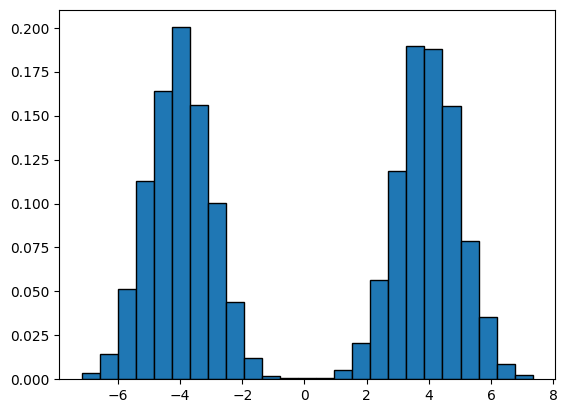

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def bimodal_sample(size: int, mu_1: float = 0.0, sigma_1: float = 1.0, mu_2: float = 0.0, sigma_2: float = 1.0, p_2: float = 0.5) -> np.ndarray:
    x_1 = np.random.standard_normal(size) * sigma_1 + mu_1
    x_2 = np.random.standard_normal(size) * sigma_2 + mu_2
    x = np.zeros(size)
    mask_for_x_2 = np.random.choice([True, False], size, p=[p_2, 1 - p_2])
    x[mask_for_x_2] = x_2[mask_for_x_2]
    x[~mask_for_x_2] = x_1[~mask_for_x_2]
    return x

np.random.seed(666)
x = bimodal_sample(10000, mu_1=4.0, mu_2=-4.0)

fig, ax = plt.subplots()
ax.hist(x, bins=25, edgecolor="black", facecolor="C0", density=True)
plt.show()


Epoch 1/2
[0/100] Loss: 8.176237106323242
[10/100] Loss: 5.976363182067871
[20/100] Loss: 4.6312713623046875
[30/100] Loss: 3.9657299518585205
[40/100] Loss: 4.220454692840576
[50/100] Loss: 3.3325531482696533
[60/100] Loss: 2.382744312286377
[70/100] Loss: 1.2538729906082153
[80/100] Loss: 2.308870315551758
[90/100] Loss: 1.5832571983337402
Epoch 2/2
[0/100] Loss: 1.736601710319519
[10/100] Loss: 1.6891086101531982
[20/100] Loss: 1.0088731050491333
[30/100] Loss: 1.4326151609420776
[40/100] Loss: 1.7130132913589478
[50/100] Loss: 4.4481377601623535
[60/100] Loss: 5.4987030029296875
[70/100] Loss: 1.8379724025726318
[80/100] Loss: 2.7992539405822754
[90/100] Loss: 3.3347229957580566
Test loop
[0/100] Loss: 1.2599893808364868
[10/100] Loss: 1.086982011795044
[20/100] Loss: 1.166402816772461
[30/100] Loss: 2.944152355194092
[40/100] Loss: 6.024065971374512
[50/100] Loss: 1.8120441436767578
[60/100] Loss: 3.5192840099334717
[70/100] Loss: 1.183377742767334
[80/100] Loss: 2.480673789978027

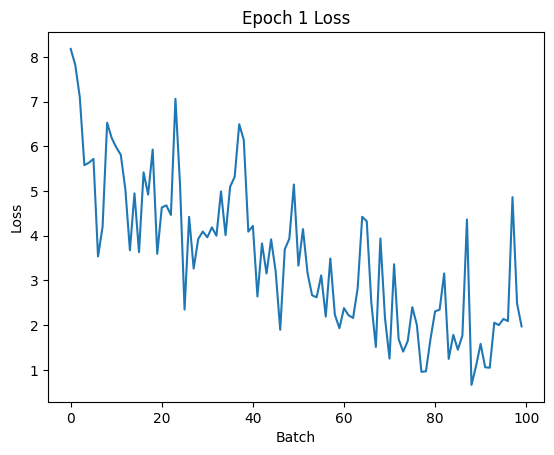

In [2]:
from conditional_diffusion.diffusion import DiffusionSettings, Diffusion
from conditional_diffusion.logger import StepLogger

BATCH_SIZE = 36
NUM_BATCHES = 100
NUM_EPOCHS = 2

train_batches = x[0:(BATCH_SIZE * NUM_BATCHES)].reshape((NUM_BATCHES, BATCH_SIZE))
test_batches = x[(BATCH_SIZE * NUM_BATCHES):(2 * BATCH_SIZE * NUM_BATCHES)].reshape((NUM_BATCHES, BATCH_SIZE))

logger = StepLogger(max_step=NUM_BATCHES, skip=10)

diffusion_settings = DiffusionSettings()
diffusion = Diffusion(diffusion_settings)

epoch_stats = []
for epoch in range(NUM_EPOCHS):
    print(f"Epoch {epoch+1}/{NUM_EPOCHS}")
    stats = diffusion.train_or_test_loop(train_batches, train=True, logger=logger)
    epoch_stats.append(stats)

print("Test loop")
diffusion.train_or_test_loop(test_batches, train=False, logger=logger)

fig, ax = plt.subplots()
ax.plot(np.arange(len(train_batches)), epoch_stats[0].loss)
ax.set_xlabel("Batch")
ax.set_ylabel("Loss")
ax.set_title("Epoch 1 Loss")
plt.show()

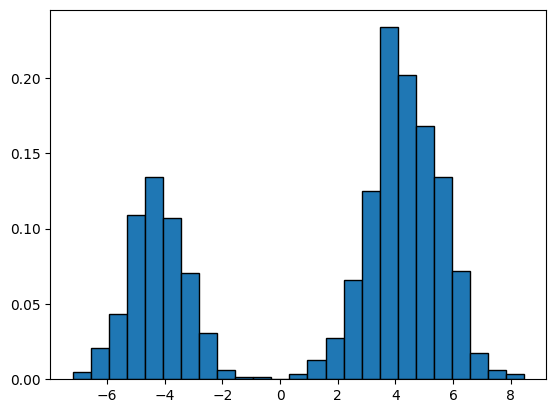

In [3]:
from conditional_diffusion.sampler import SamplerSettings, StochasticSampler

sampler_settings = SamplerSettings(s_noise=1.0, s_churn=2.0, num_steps=51)
sampler = StochasticSampler(diffusion, sampler_settings)

sample = sampler.generate_sample(size=1000, return_full=True)

fig, ax = plt.subplots()
ax.hist(sample[-1], bins=25, edgecolor="black", facecolor="C0", density=True)
plt.show()

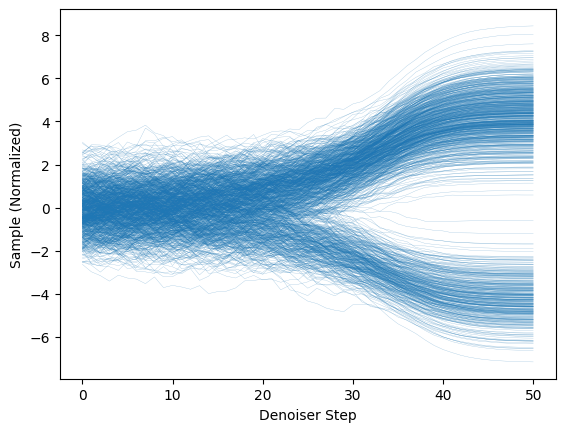

In [4]:
fig, ax = plt.subplots()
steps = np.arange(sampler_settings.num_steps)
for x in sample.T:
    ax.plot(steps, x / (1 + sampler._t_grid), c="C0", lw=0.2, alpha=0.5)
ax.set_xlabel("Denoiser Step")
ax.set_ylabel("Sample (Normalized)")
plt.show()